In [1]:
import numpy as np
import pandas as pd
import sklearn

In [2]:
names = ["Mike","Max","Robin","Simon","Markus"]

In [3]:
np.random.shuffle(names)

In [4]:
names

['Markus', 'Mike', 'Robin', 'Simon', 'Max']

In [5]:
data = pd.read_csv("../14_trees/train.tsv", sep = "\t").dropna()

In [6]:
data

,species,latitude,longitude,stem_diameter_cm,height_m,crown_radius_m
0,Fagus sylvatica,46.01,11.44,5.0,6.7,2.05
1,Fagus sylvatica,46.03,11.44,5.0,11.1,2.90
2,Fagus sylvatica,46.03,11.44,5.0,14.2,4.00
3,Fagus sylvatica,46.03,11.44,5.0,5.7,2.10
4,Fagus sylvatica,46.03,11.44,5.0,8.0,4.15
...,...,...,...,...,...,...
35094,Fagus sylvatica,47.38,9.09,36.0,22.6,4.50
35095,Fagus sylvatica,46.74,6.85,37.0,34.3,4.50
35096,Fagus sylvatica,47.45,9.29,38.0,33.8,5.00
35097,Fagus sylvatica,46.52,6.35,40.0,29.3,6.00


In [7]:
data.min()

species             Fagus sylvatica
latitude                     36.263
longitude                    -9.148
stem_diameter_cm                2.0
height_m                        1.5
crown_radius_m                 0.25
dtype: object

In [8]:
data.max()

species             Quercus ilex
latitude                  55.451
longitude                   26.0
stem_diameter_cm           162.0
height_m                    43.9
crown_radius_m              12.8
dtype: object

In [9]:
X = data[["latitude", "longitude", "stem_diameter_cm", "height_m", "crown_radius_m"]]
y = data["species"]

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y)

In [10]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

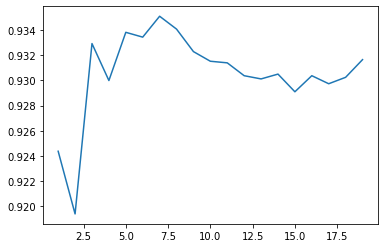

In [23]:
scores = []
for k in range(1, 20):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train_scaled, y_train)
    scores.append(neigh.score(X_val_scaled, y_val))
    
import matplotlib.pyplot as plt
plt.plot(list(range(1,len(scores)+1)), scores)

In [24]:
np.argmax(scores)+1

7

(-10.9054, 27.7574, -6.0, 170.0)

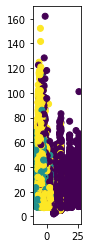

In [13]:
plt.scatter(X_train.iloc[:,1], X_train.iloc[:,2],c = y_train.astype("category").cat.codes )
plt.axis("scaled") 

(-1.7156205141589456,
 8.375153334203315,
 -1.3766816143497755,
 6.515695067264574)

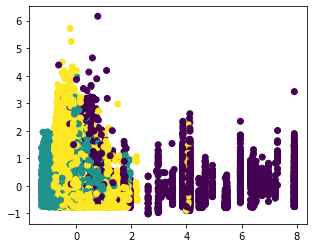

In [14]:
plt.scatter(X_train_scaled[:,1], X_train_scaled[:,2],c = y_train.astype("category").cat.codes )
plt.axis("scaled")

In [15]:
c = y_train.astype("category").cat.codes 

In [16]:
test = pd.read_csv("../14_trees/test.tsv", sep = "\t").dropna()

In [17]:
X_test = test[["latitude", "longitude", "stem_diameter_cm", "height_m", "crown_radius_m"]]
treeID = test["tree_id"]

In [18]:
X_test_scaled = scaler.transform(X_test)

In [25]:
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X_train_scaled, y_train)
prediction = neigh.predict(X_test_scaled)

In [26]:
pred = pd.DataFrame()
pred["tree_id"] = treeID
pred["species"] = prediction

In [27]:
pred.to_csv("knn_7_scaled_robust.tsv", sep="\t", index=False)